In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [3]:
dataset_path = "C:\Infosys Springboard\Data Sets\Flowers"
#Filtered Flower dataset to only contain Dandelion & Rose
def load_dataset(dataset_path):
    images = []
    labels = []
    for label in os.listdir(dataset_path):
        if label in ['dandelion', 'rose']:  # Filter only dandelion and rose images
            label_path = os.path.join(dataset_path, label)
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                # Extract features from the image
                image = cv2.imread(image_path)
                # Resize the image (optional)
                resized_image = cv2.resize(image, (100, 100))  # Resize to 100x100 pixels
                # Flatten the image to a 1D array
                flattened_image = resized_image.flatten()
                # Append the features and corresponding label to lists
                images.append(flattened_image)
                labels.append(label)
    return images, labels

images, labels = load_dataset(dataset_path)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [4]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [5]:
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of testing images:", test_images.shape)
print("Shape of testing labels:", test_labels.shape)

Shape of training images: (1468, 30000)
Shape of training labels: (1468,)
Shape of testing images: (368, 30000)
Shape of testing labels: (368,)


In [6]:
train_images = train_images.reshape(len(train_images),100,100,3)
train_labels = train_labels.reshape(len(train_labels),1)

test_images = test_images.reshape(len(test_images),100,100,3)
test_labels = test_labels.reshape(len(test_labels),1)

In [7]:
train_images = train_images / 255.0
test_images = test_images/255.0

In [8]:
test_labels

array([['dandelion'],
       ['rose'],
       ['rose'],
       ['rose'],
       ['dandelion'],
       ['rose'],
       ['dandelion'],
       ['rose'],
       ['dandelion'],
       ['rose'],
       ['rose'],
       ['dandelion'],
       ['rose'],
       ['rose'],
       ['rose'],
       ['rose'],
       ['rose'],
       ['dandelion'],
       ['rose'],
       ['rose'],
       ['dandelion'],
       ['dandelion'],
       ['rose'],
       ['dandelion'],
       ['rose'],
       ['dandelion'],
       ['rose'],
       ['rose'],
       ['dandelion'],
       ['dandelion'],
       ['rose'],
       ['dandelion'],
       ['dandelion'],
       ['rose'],
       ['dandelion'],
       ['dandelion'],
       ['dandelion'],
       ['rose'],
       ['rose'],
       ['dandelion'],
       ['dandelion'],
       ['dandelion'],
       ['rose'],
       ['rose'],
       ['dandelion'],
       ['dandelion'],
       ['dandelion'],
       ['dandelion'],
       ['dandelion'],
       ['dandelion'],
       ['dandelion']

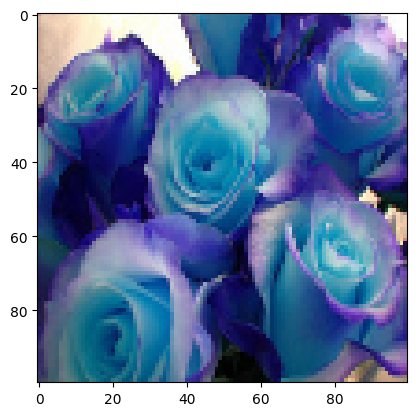

In [9]:
import matplotlib.pyplot as plt
import random

id = random.randint(0,len(train_images))
plt.imshow(train_images[id,:])
plt.show()

In [2]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1,activation='sigmoid')
])

NameError: name 'Sequential' is not defined

In [1]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'model' is not defined

In [12]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.fit_transform(test_labels)

# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
train_labels_encoded = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels_encoded = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1))

C:\Users\bhask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
import numpy as np
# Cast one-hot encoded labels to integers
train_labels_encoded_int = np.argmax(train_labels_encoded.toarray(), axis=1)
test_labels_encoded_int = np.argmax(test_labels_encoded.toarray(), axis=1)

In [14]:
model.fit(train_images, train_labels_encoded_int, epochs=10,batch_size=64)

C:\Users\bhask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step - accuracy: 0.5428 - loss: 0.7954
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.8175 - loss: 0.4794
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.8374 - loss: 0.3784
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.8742 - loss: 0.3051
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.8979 - loss: 0.2575
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.8932 - loss: 0.2534
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9316 - loss: 0.1847
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.9107 - loss: 0.2182
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9448 - loss: 0.1450
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.9708 - loss: 0.0995


In [15]:
model.evaluate(test_images,test_labels_encoded_int)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8976 - loss: 0.2887


[0.2945775091648102, 0.89402174949646]

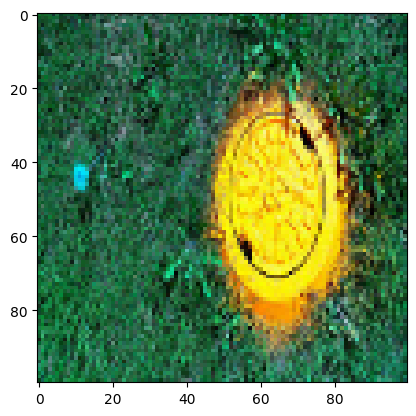

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.30152938]]
Dandelion


In [16]:
id1 = random.randint(0,len(test_labels))
plt.imshow(test_images[id1,:])
plt.show()

y_pred = model.predict(test_images[id1,:].reshape(1,100,100,3))
print(y_pred)

if y_pred>0.5:
    print("Rose")
else:
    print("Dandelion")

In [18]:
model.save('flower_classifier.h5')

In [19]:
# Save in TensorFlow SavedModel format
tf.saved_model.save(model, 'flower_classifier')

INFO:tensorflow:Assets written to: flower_classifier\assets


INFO:tensorflow:Assets written to: flower_classifier\assets


In [21]:
model.fit(train_images, train_labels_encoded_int, epochs=10,batch_size=64)

Epoch 1/10


C:\Users\bhask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9833 - loss: 0.0703
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9871 - loss: 0.0470
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.9910 - loss: 0.0389
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9918 - loss: 0.0338
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.9955 - loss: 0.0197
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.9975 - loss: 0.0135
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9983 - loss: 0.0154
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9992 - loss: 0.0072
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9997 - loss: 0.0041
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 1.0000 - loss: 0.0047


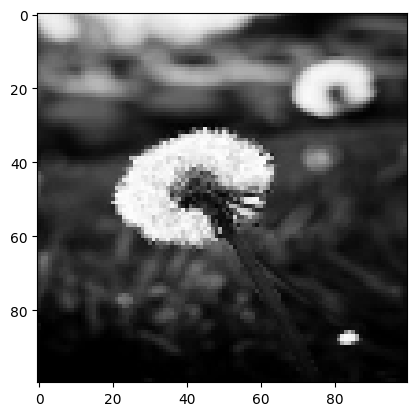

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.00044285]]
Dandelion


In [22]:
id1 = random.randint(0,len(test_labels))
plt.imshow(test_images[id1,:])
plt.show()

y_pred = model.predict(test_images[id1,:].reshape(1,100,100,3))
print(y_pred)

if y_pred>0.5:
    print("Rose")
else:
    print("Dandelion")

In [23]:
# Load the model
loaded_model = tf.keras.models.load_model('flower_classifier.h5')